## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

Text(0.5, 1.0, 'ACF for price')

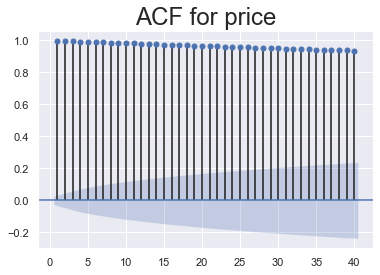

In [5]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('ACF for price', size=24)

## The PACF

Text(0.5, 1.0, 'PACF for price')

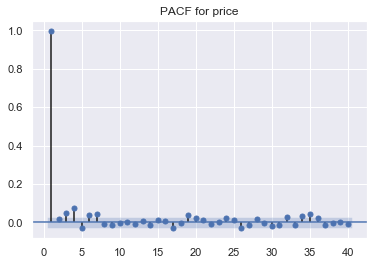

In [6]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title('PACF for price')

## The AR(1) Model

In [7]:
model_ar = ARMA(df.market_value, order=(1,0))

In [8]:
result_ar = model_ar.fit()

In [9]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Tue, 24 Dec 2019   AIC                          55251.195
Time:                        09:11:13   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5047.9241    486.737     10.371      0.000    4093.937    6001.912
ar.L1.market_value     0.9985      0.001   1298.904      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
import statsmodels.tsa.arima_model as arima_model

## Higher-Lag AR Models

In [11]:
model_ar2 = ARMA(df.market_value, order=(2,0) )
result_ar2 = model_ar2.fit()
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Tue, 24 Dec 2019   AIC                          55251.742
Time:                        09:11:17   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    495.696     10.268      0.000    4118.094    6061.188
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4628           +0.0000j           58.4628            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
model_ar3 = ARMA(df.market_value, order=(3,0) )
result_ar3 = model_ar3.fit()
result_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Tue, 24 Dec 2019   AIC                          55241.742
Time:                        09:11:19   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    520.411      9.780      0.000    4069.655    6109.628
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [20]:
model_ar4 = ARMA(df.market_value, order=(4,0) )
result_ar4 = model_ar4.fit()
result_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Tue, 24 Dec 2019   AIC                          55217.130
Time:                        09:13:32   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    559.981      9.089      0.000    3992.099    6187.183
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

In [21]:
result_ar4.llf

-27602.56509430219

## LLR Test

In [17]:
def LLR_test(mod1, mod2, DF=1):
    L1 = mod1.llf
    L2 = mod2.llf
    LR = ( 2 * (L2 - L1))
    p= chi2.sf(LR, DF).round(3)
    return p

    

## Comparing Higher-Lag AR Models

In [22]:
LLR_test(result_ar3, result_ar4)

0.0

In [23]:
LLR_test(result_ar2, result_ar4, DF=2)

0.0

In [24]:
LLR_test(result_ar, result_ar4, DF=3)

0.0

In [25]:
LLR_test(result_ar, result_ar2)

0.228

In [32]:
def test_2Model(data, ord1, ord2):
    if ord1 > ord2:
        ord1, ord2 = ord2, ord1
    model_ar1 = ARMA(data, order=(ord1,0))
    result_ar1 = model_ar1.fit()
    model_ar2 = ARMA(data, order=(ord2, 0))
    result_ar2 = model_ar2.fit()
    p = LLR_test(result_ar1, result_ar2, DF=ord2-ord1)
    print('test order:', ord1, 'order:', ord2, 'the p value for LLR=', p)
    return p


In [33]:
test_2Model(df.market_value, 1, 2)

test order: 1 order: 2 the p value for LLR= 0.228


0.228

In [35]:
for i in range(1, 10):
    _= test_2Model(df.market_value, i, i+1)
    _= test_2Model(df.market_value, 1, i+1)
    print('')

test order: 1 order: 2 the p value for LLR= 0.228
test order: 1 order: 2 the p value for LLR= 0.228

test order: 2 order: 3 the p value for LLR= 0.001
test order: 1 order: 3 the p value for LLR= 0.001

test order: 3 order: 4 the p value for LLR= 0.0
test order: 1 order: 4 the p value for LLR= 0.0

test order: 4 order: 5 the p value for LLR= 0.035
test order: 1 order: 5 the p value for LLR= 0.0

test order: 5 order: 6 the p value for LLR= 0.005
test order: 1 order: 6 the p value for LLR= 0.0

test order: 6 order: 7 the p value for LLR= 0.002
test order: 1 order: 7 the p value for LLR= 0.0

test order: 7 order: 8 the p value for LLR= 0.571
test order: 1 order: 8 the p value for LLR= 0.0

test order: 8 order: 9 the p value for LLR= 0.288
test order: 1 order: 9 the p value for LLR= 0.0

test order: 9 order: 10 the p value for LLR= 0.792
test order: 1 order: 10 the p value for LLR= 0.0



## Analysing the Residuals

In [36]:
model_ar7 = ARMA(df.market_value, order=(7,0) )
result_ar7 = model_ar7.fit()
result_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Wed, 25 Dec 2019   AIC                          55201.799
Time:                        10:08:39   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    589.579      8.633      0.000    3934.087    6245.195
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value    -0.0304      0.020     -1.540      0.124      -0.069       0.008
ar.L3.market_value    -0.0267      0.020     -1.353      0.176      -0.065       0.012
ar.L4.market_value     0.1038      0.020      5.279      0.000       0.065       0.142
ar.L5.market_value    -0.0668      0.020     -3.385      0.001      -0.105      -0.028
ar.L6.market_value    -0.0025      0.020     -0.127      0.899      -0.041       0.036
ar.L7.market_value     0.0427      0.014      3.026      0.002       0.015       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            1.3301           -0.9296j            1.6228           -0.0971
AR.3            1.3301           +0.9296j            1.6228            0.0971
AR.4           -0.0400           -1.5870j            1.5875           -0.2540
AR.5           -0.0400           +1.5870j            1.5875            0.2540
AR.6           -1.7612           -0.6517j            1.8779           -0.4436
AR.7           -1.7612           +0.6517j            1.8779            0.4436
-----------------------------------------------------------------------------
"""

In [43]:
df.loc[:]['res_price'] = result_ar7.resid

In [39]:
df['res_price'].head()

date
1994-01-07   -1643.661196
1994-01-10      -7.790656
1994-01-11     -29.260144
1994-01-12     -44.778361
1994-01-13     -16.827966
Freq: B, Name: res_price, dtype: float64

In [45]:
df.res_price.mean()

0.3522452232633859

In [46]:
df.res_price.var()

4005.9446217892373

In [47]:
sts.adfuller(df.res_price)

(-76.07469560252062,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.41509995297)

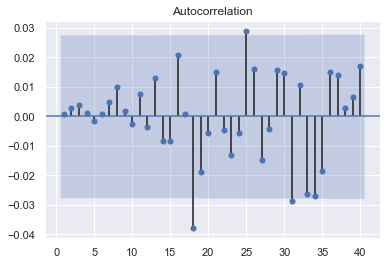

In [49]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.show()

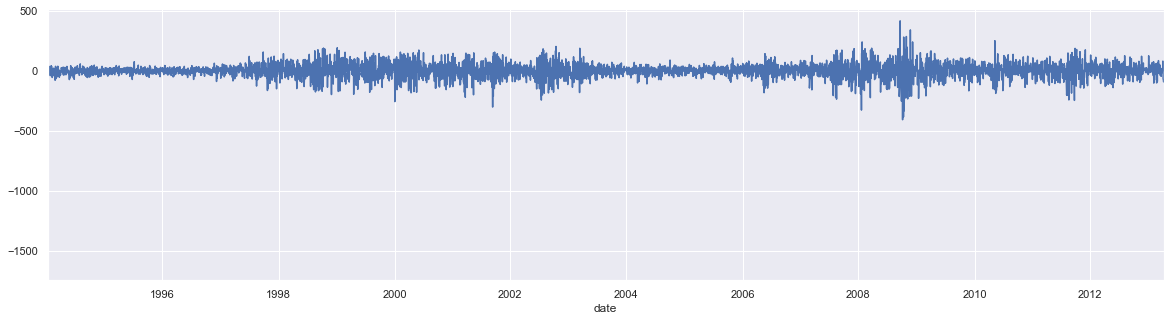

In [55]:
df.res_price.plot(figsize = (20,5))

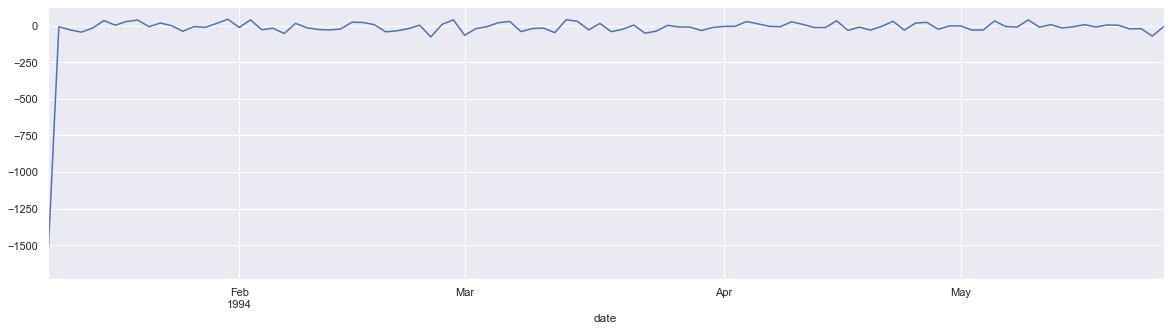

In [61]:
df[0:100].res_price.plot(figsize = (20,5))

In [62]:
df.res_price.head(10)

date
1994-01-07   -1643.661196
1994-01-10      -7.790656
1994-01-11     -29.260144
1994-01-12     -44.778361
1994-01-13     -16.827966
1994-01-14      34.258566
1994-01-17       2.761571
1994-01-18      28.244499
1994-01-19      37.754215
1994-01-20      -7.623128
Freq: B, Name: res_price, dtype: float64